In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit_machine_learning
!pip install qiskit_algorithms
!pip install matplotlib
!pip install pylatexenc
!pip install scipy
!pip install -U scikit-learn

In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, QasmSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector

SEED = 8398

## Question 4

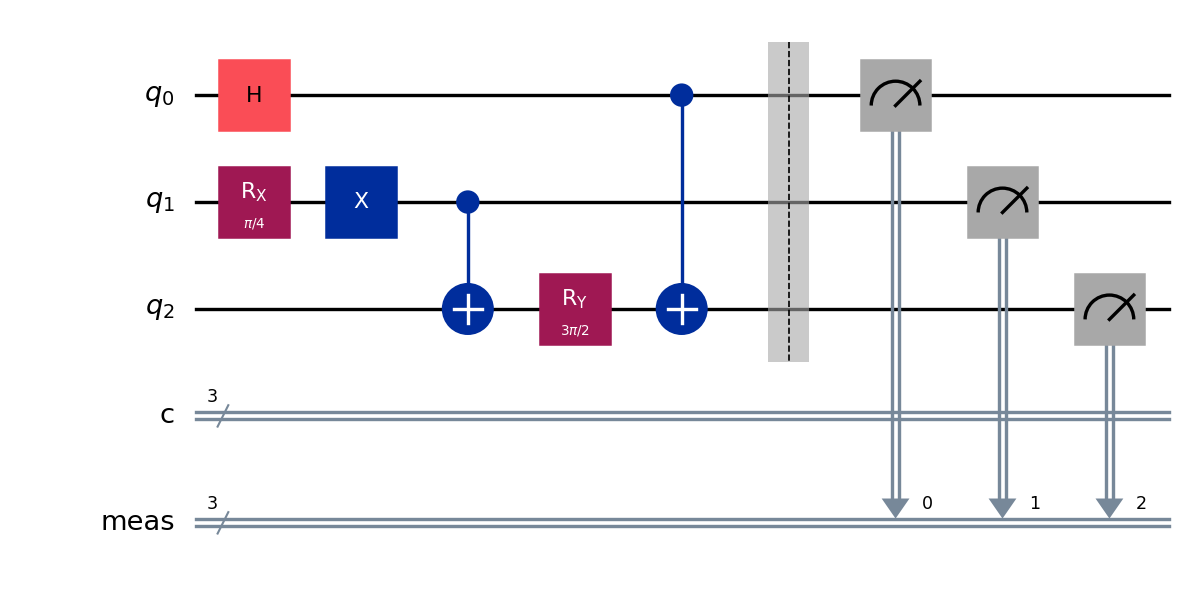

{'101 000': 37, '011 000': 235, '111 000': 202, '100 000': 36, '110 000': 211, '001 000': 32, '000 000': 22, '010 000': 225}


In [2]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import QasmSimulator

# Créer le circuit avec 3 qubits
qc = QuantumCircuit(3,3)

# Ajouter les portes selon le diagramme
qc.h(0)  # Porte H sur q0
qc.rx(pi/4, 1)  # Rotation Rx(π/4) sur q1
qc.x(1)  # Porte X sur q1

# Premier CNOT entre q1 et q2
qc.cx(1, 2)

# Rotation Ry(3π/2) sur q2
qc.ry(3*pi/2, 2)

# Second CNOT entre q0 et q2
qc.cx(0, 2)

# Mesures
qc.measure_all()

# Afficher le circuit
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
qc.draw('mpl', ax=ax)
plt.tight_layout()
plt.show()

# Exécuter le circuit
simulator = QasmSimulator()
job = simulator.run(qc, shots=1000, seed_simulator=42)
result = job.result()
counts = result.get_counts()
print(counts)

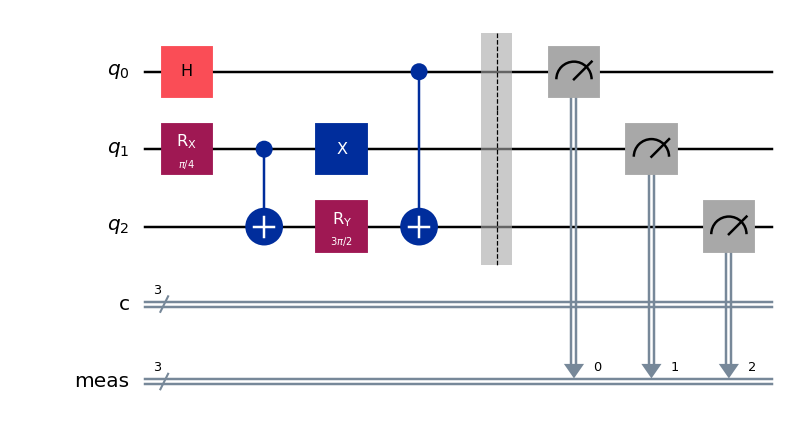

{'101 000': 37, '011 000': 235, '111 000': 202, '100 000': 36, '110 000': 211, '001 000': 32, '000 000': 22, '010 000': 225}


In [30]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import QasmSimulator

# Créer le circuit avec 3 qubits
qc = QuantumCircuit(3,3)

# Ajouter les portes selon le diagramme
qc.h(0)  # Porte H sur q0
qc.rx(pi/4, 1)  # Rotation Rx(π/4) sur q1

# Premier CNOT entre q1 et q2
qc.cx(1, 2)

qc.x(1)  # Porte X sur q1

# Rotation Ry(3π/2) sur q2
qc.ry(3*pi/2, 2)

# Second CNOT entre q0 et q2
qc.cx(0, 2)

# Mesures
qc.measure_all()

# Afficher le circuit
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
qc.draw('mpl', ax=ax)
plt.tight_layout()
plt.show()

# Exécuter le circuit avec le simulateur qasm_simulator
simulator = QasmSimulator()
result = simulator.run(qc, shots=1000, seed_simulator=42).result()
counts = result.get_counts()
print(counts)


## Question 5

In [18]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator, QasmSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector

def angle_embedding(qc, feature_vec):
    """
    Encodage par angle avec des portes RX.

    :param qc: Le circuit quantique.
    :param feature_vec: Le vecteur de paramètres utilisés pour charger les données.
                        Le nombre de qubit dans le circuit devrait être égal
                        aux nombres de caractéristiques dans le vecteur de données
    :return: Le circuit quantique auquel on a ajouté une couche d'encodage par angle.
    """
    if qc.num_qubits != len(feature_vec):
        raise ValueError('Le nombre de caractéristiques doit être égal au nombre de qubits.')

    for i in range(qc.num_qubits):
        qc.rx(feature_vec[i], i)

    return qc

# Nombre de caractéristiques
nb_features = 4
# Vecteur de données
x = [0.5, -3, 5.5, -2.8]

# Nombre de qubits
nb_qubits = nb_features
# Créer le circuit quantique
qc = QuantumCircuit(nb_qubits)
# Appliquer l'encodage par angle
qc = angle_embedding(qc, x)

# Ajouter des mesures pour tous les qubits
qc.measure_all()

simulator = QasmSimulator()
result = simulator.run(qc, shots=1000, seed_simulator=42).result()
counts = result.get_counts()
print(counts)

{'0110': 3, '1111': 8, '0010': 13, '1100': 1, '1000': 4, '1110': 114, '1011': 47, '1010': 810}


## Question 6

In [33]:
import numpy as np
from qiskit.circuit.library import ZZFeatureMap
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt
from qiskit_aer import QasmSimulator

# Créer le vecteur de données
x = [0.5, -3, 5.5, -2.8]

# Créer le circuit ZZFeatureMap
zz_circuit = ZZFeatureMap(feature_dimension=4, reps=2)  # ajout du paramètre reps pour répétitions
encode_circuit = zz_circuit.assign_parameters(parameters=x)

# Dessiner le circuit
qc = encode_circuit.decompose()

# Ajouter des mesures pour tous les qubits
qc.measure_all()

# Exécuter le circuit avec le simulateur qasm_simulator
simulator = QasmSimulator()
result = simulator.run(qc, shots=1000, seed_simulator=42).result()
counts = result.get_counts()
print(counts)



{'0110': 2, '1000': 2, '1010': 6, '0101': 90, '1110': 24, '1101': 54, '1111': 49, '0001': 12, '0011': 30, '0111': 75, '0100': 164, '1100': 26, '1011': 17, '1001': 26, '0010': 149, '0000': 274}


In [41]:
from qiskit_machine_learning.circuit.library import RawFeatureVector

nb_features = 4
qc = RawFeatureVector(nb_features)

x = [0.5, -3, 5.5, -2.8]
qc = qc.assign_parameters(x)
qc2 = qc.decompose()
qc2.draw('mpl')

qc2.measure_all()

# Exécuter le circuit avec le simulateur qasm_simulator
simulator = QasmSimulator()
result = simulator.run(qc2, shots=1000, seed_simulator=42).result()
counts = result.get_counts()
print(counts)

{'01': 195, '00': 2, '11': 141, '10': 662}


## Question 7

## Question 8 